# Modern Portfolio Theory

For two assets:
$$
\text{Var}(X,Y) = E[(X-E[X])^2]+2*E[(X-E[X])(Y-E[Y])] + E[(Y - E[Y])^2]
$$

given that the two assets are allocated with proportions A and B:

$$
E[(AX - E[AX])^2] = \\
E[(A(X - E[X]))^2] = E[A^2(X-E[X])^2] = A^2*E[(X - E[X])^2] = \\
A^2\text{Var}(X)
$$

$$
2*E[(AX - E[AX])(BY - E[BY])] = \\
2*E[AB(X-E[X])(Y-E[Y])] = 2*AB*E[(X-E[X])(Y-E[Y])] = \\
2*AB*\text{Cov}(X,Y)
$$

thus variance of a two asset portfolio with A and B allocation is:
$$
A^2\text{Var}(X) + B^2\text{Var}(Y) + 2*AB*\text{Cov}(X,Y)
$$

More generally:

$$
E(R_p)=\sum_i w_i E(R_i) \\
\sigma^2_p = \sum_i w_i^2\sigma^2_i + \sum_i \sum_{j \neq i} w_i w_j \text{Cov}(i,j)
$$

The portfolio return variance is also expressed as:

$$
\sigma^2_p = w^T \Sigma w
$$

NOTE: have not tried to check the math for myself. Obviously, it should be right, just would be interesting to see how the matrix version is derived.

## Criticism

* Financial returns do not follow Gaussian distribution, the actual distribution is skewed.
* Assumes risk is emotionally symmetric: same proportion loss and gain causes equal but opposite emotions. Whilst in reallity it is asymmetric -- loss of the same size as the gain causes more pain.
* Depends on EMT, thus conflates fluctuations in shareprice with "risk". The risk is only an opportunity to buy or sell assets at attractive prices in as much as it suits one's book. This is from the point of view of contrarian/value investor. Basically, ignores liquidity variable when looking at risk.

In [1]:
import ffn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
prices = ffn.get('msft,aapl,amzn,fb,brk-b,gc=f', start='2016-01-01')

In [4]:
def portfolio_std(S, weights):
    return np.sqrt(np.dot(weights.T,np.dot(S, weights))) * np.sqrt(252)

def portfolio_returns(e_returns, weights):
    return np.sum(weights * e_returns)

returns = prices.dropna().pct_change().dropna()
mu = (1 + returns).prod() ** (252 / returns.count()) - 1
# annualized covariance: Var(X) + Var(X) ...
S = returns.cov() * 252

weights = np.ones(6) * 1/6

portfolio_returns(returns.to_numpy(), weights)
portfolio_std(S, weights)

3.087644107393026

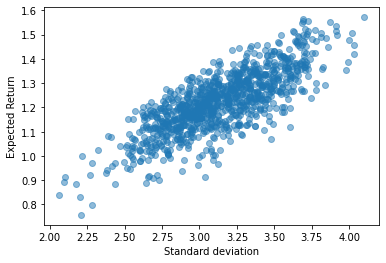

In [7]:
W = np.random.uniform(size=(1000, 6))
W = W/np.array([np.sum(W,axis=1).transpose(),]*6).transpose()
# portfolio std
x = np.zeros(W.shape[0])
# portfolio returns
y = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    x[i] = portfolio_std(S, W[i])
    y[i] = portfolio_returns(returns.to_numpy(), W[i])
plt.scatter(x,y, alpha=.5)
plt.xlabel('Standard deviation')
plt.ylabel('Expected Return')
plt.show()

## Resources

* [Portfolio Theory: Tutorial 1](https://www.youtube.com/watch?v=lPKtI90f_sE)
* [Modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory#Capital_asset_pricing_model)